# INFO PILLAR SOLUTION

# Task 4 : Housing Prices Prediction Project 

# Role : Machine Learning Intern at Info Pillar Solution

# Author : Vetrivel D 


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#importing Databaset
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
data.columns = boston.feature_names
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
data.shape

(506, 13)

In [7]:
data.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1    

In [8]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [10]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

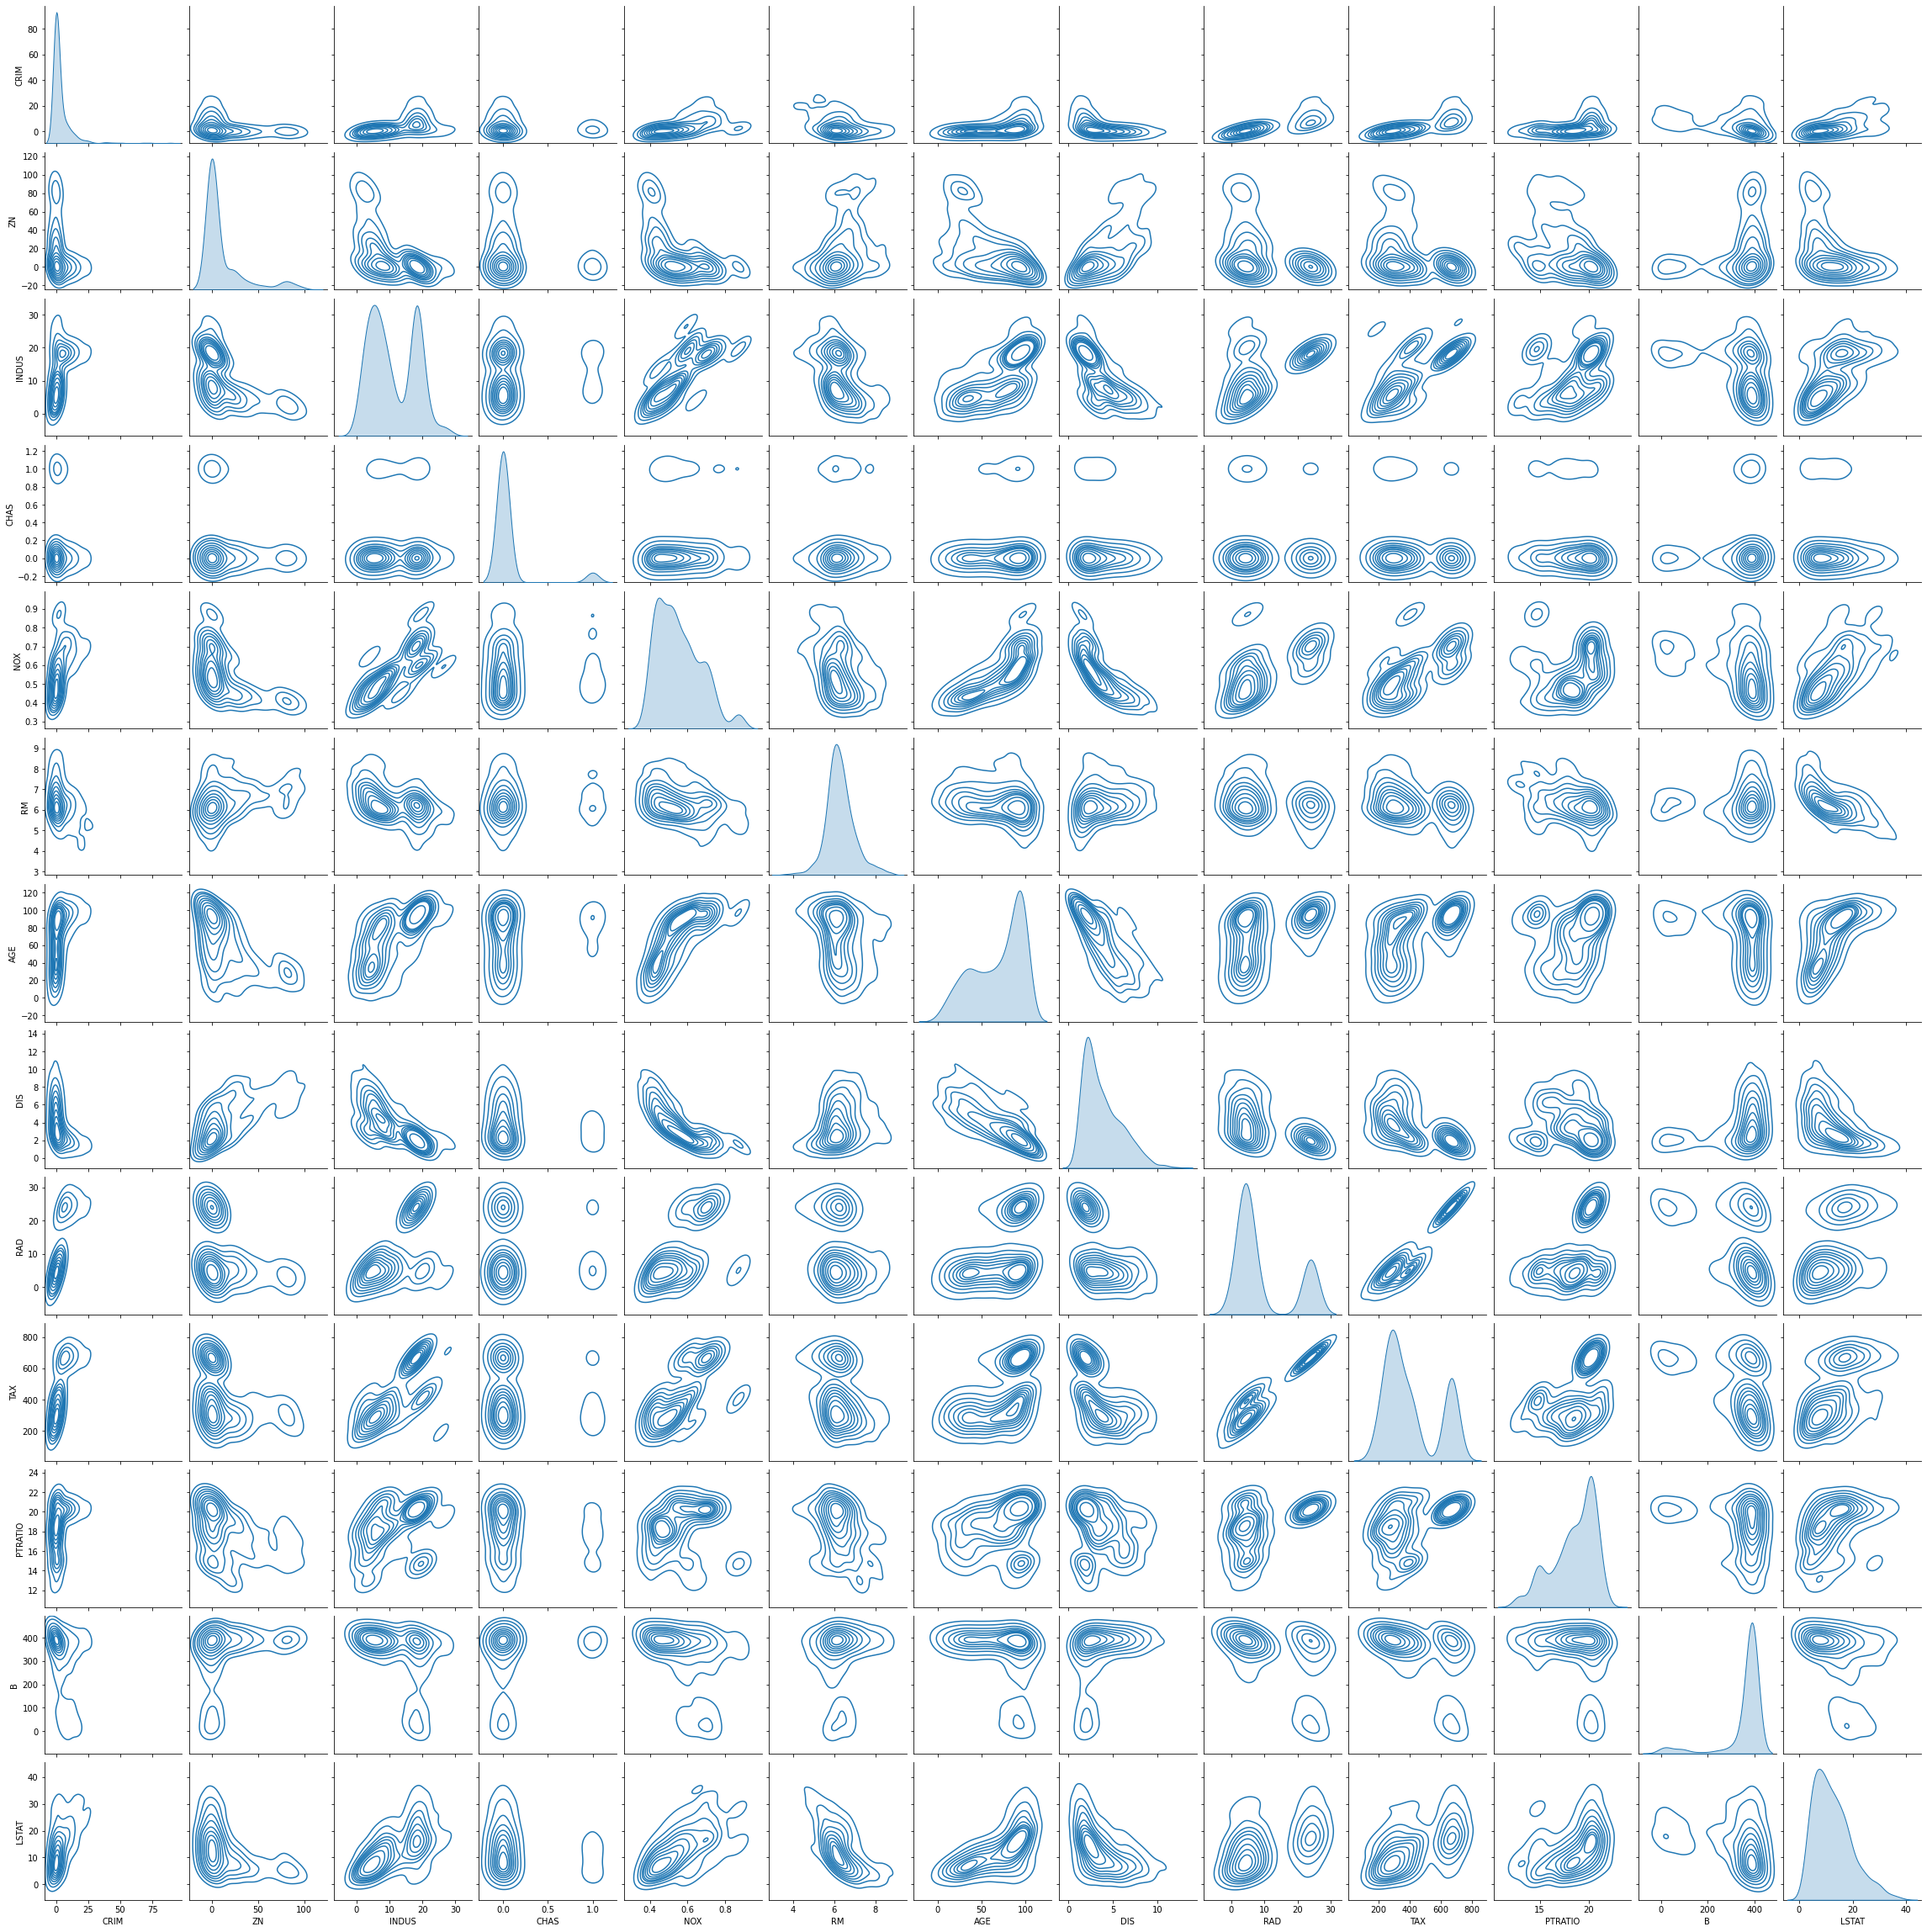

In [11]:
sns.pairplot(data, dropna = True, kind="kde");

In [13]:
print(boston.target.shape)
print(boston.feature_names)

(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [14]:
## Adding Target column to the data (i.e) 'Price' column 
data['PRICE']=boston.target
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


<AxesSubplot:>

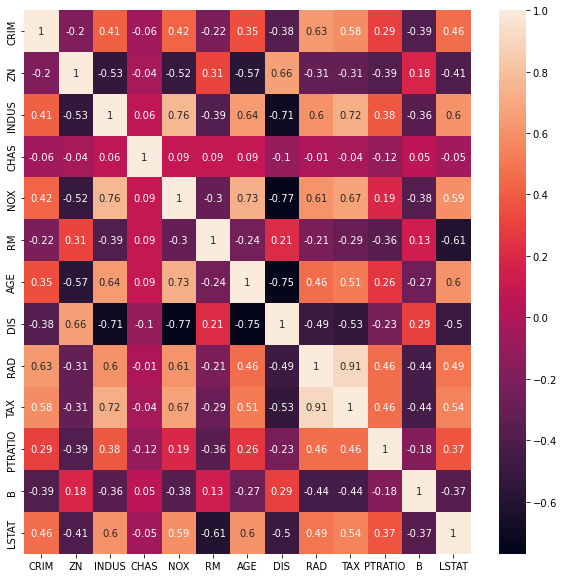

In [15]:
boston_1=pd.DataFrame(boston.data, columns=boston.feature_names)
correlation_matrix=boston_1.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

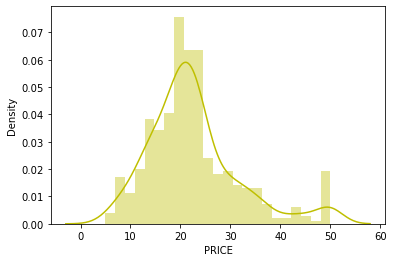

In [16]:
sns.distplot(data['PRICE'],color='y')

In [17]:
X=data.iloc[ :, :-1].values
y=data.iloc[ :, -1].values

print("Shape of X is :",X.shape)
print("Shape of y is :",y.shape)

Shape of X is : (506, 13)
Shape of y is : (506,)


In [18]:
# splitting train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
# print(y_test)

X_train : (404, 13)
X_test : (102, 13)
y_train : (404,)


In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("X_train :",X_train.shape)
print("X_valid :",X_valid.shape)
print("y_train :",y_train.shape)
print("y_valid :",y_valid.shape)

X_train : (323, 13)
X_valid : (81, 13)
y_train : (323,)
y_valid : (81,)


In [20]:
linear=LinearRegression()
linear.fit(X_train, y_train)
pred_test=linear.predict(X_test)
pred_train=linear.predict(X_train)

In [21]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_train, pred_train)))

4.422657403442876


In [22]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, pred_test)))

5.754829290440042


In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, pred_test)

0.5932863193296465

In [24]:
#comapring actual and predicted values
data = pd.DataFrame({'Actual': y_test, 'Prediction': pred_test})
data

,Actual,Prediction
0,22.6,25.081434
1,50.0,24.220253
2,23.0,28.557270
3,8.3,11.967467
4,21.2,21.005847
...,...,...
97,24.7,25.459424
98,14.1,15.116780
99,18.7,17.721074
100,28.1,25.504005


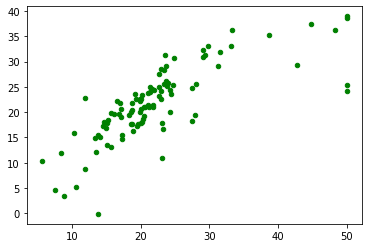

In [25]:
plt.scatter(y_test,pred_test,s=20,c="g")

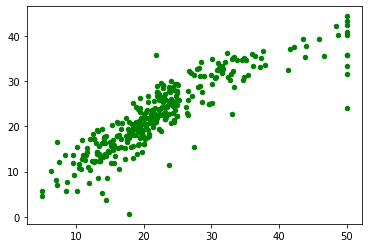

In [26]:
plt.scatter(y_train,pred_train,s=20,c="g")

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))

Mean Absolute Error: 3.8684516070792325


**THANK YOU :)**